# Practical 10: Simple Linear Regression for House Price Prediction

In this practical, we will build a simple linear regression model to predict house prices based on square footage.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Create Simple House Data

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 house square footage values (between 1000 and 3000 sq ft)
square_feet = np.random.uniform(1000, 3000, 100)

# Generate house prices based on square footage
# Formula: price = 100 * square_feet + random noise
prices = 100 * square_feet + np.random.normal(0, 15000, 100)

# Create a dataframe
house_data = pd.DataFrame({
    'SquareFeet': square_feet,
    'Price': prices
})

# Display first 5 rows
house_data.head()

,SquareFeet,Price
0,1749.080238,176213.729793
1,2901.428613,285657.751025
2,2463.987884,247775.200010
3,2197.316968,189918.163120
4,1312.037281,127908.649771


## 2. Visualize the Data

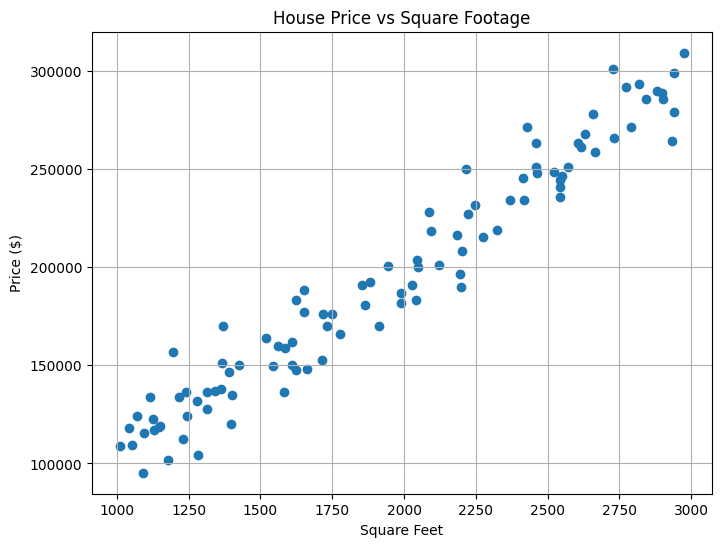

Correlation between Square Footage and Price: 0.9733


In [3]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(house_data['SquareFeet'], house_data['Price'])
plt.title('House Price vs Square Footage')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = house_data['SquareFeet'].corr(house_data['Price'])
print(f"Correlation between Square Footage and Price: {correlation:.4f}")

## 3. Split Data into Training and Testing Sets

In [4]:
# Prepare data for model
X = house_data[['SquareFeet']]  # Features
y = house_data['Price']         # Target

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape[0]} samples")
print(f"Testing data: {X_test.shape[0]} samples")

Training data: 80 samples
Testing data: 20 samples


## 4. Build and Train the Model

In [5]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Show model coefficients
print(f"Intercept: ${model.intercept_:.2f}")
print(f"Price per square foot: ${model.coef_[0]:.2f}")
print(f"\nRegression equation: Price = ${model.intercept_:.2f} + ${model.coef_[0]:.2f} × Square Footage")

Intercept: $5153.84
Price per square foot: $96.99

Regression equation: Price = $5153.84 + $96.99 × Square Footage


## 5. Make Predictions and Evaluate the Model

In [6]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): $147082390.59
Root Mean Squared Error (RMSE): $12127.75
R-squared (R²): 0.9601


## 6. Visualize the Regression Line

c:\Users\admi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


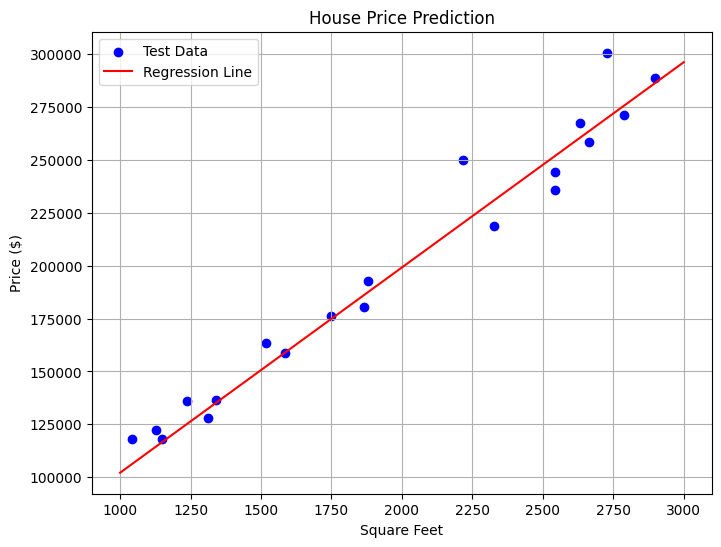

In [7]:
# Create a range of square footage values for plotting
x_range = np.linspace(1000, 3000, 100).reshape(-1, 1)
y_range = model.predict(x_range)

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(x_range, y_range, color='red', label='Regression Line')
plt.title('House Price Prediction')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

## 7. Predict Prices for New House Sizes

In [8]:
# New house sizes to predict prices for
new_houses = np.array([1500, 2000, 2500]).reshape(-1, 1)

# Make predictions
predicted_prices = model.predict(new_houses)

# Display results
for size, price in zip(new_houses.flatten(), predicted_prices):
    print(f"A house with {size} square feet is predicted to cost: ${price:.2f}")

A house with 1500 square feet is predicted to cost: $150638.63
A house with 2000 square feet is predicted to cost: $199133.55
A house with 2500 square feet is predicted to cost: $247628.48


c:\Users\admi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
